Random Forest Results:
Accuracy: 0.760119940029985
Precision: 0.5046554934823091
Recall: 0.5587628865979382
F1 Score: 0.5303326810176126
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1516
           1       0.50      0.56      0.53       485

    accuracy                           0.76      2001
   macro avg       0.68      0.69      0.68      2001
weighted avg       0.77      0.76      0.76      2001

Neural Network (MLP) Results:
Accuracy: 0.7286356821589205
Precision: 0.4496527777777778
Recall: 0.534020618556701
F1 Score: 0.4882186616399623
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1516
           1       0.45      0.53      0.49       485

    accuracy                           0.73      2001
   macro avg       0.65      0.66      0.65      2001
weighted avg       0.75      0.73      0.74      2001

VotingClassifier Results:
Accuracy: 0.7541229385307346
Precision:

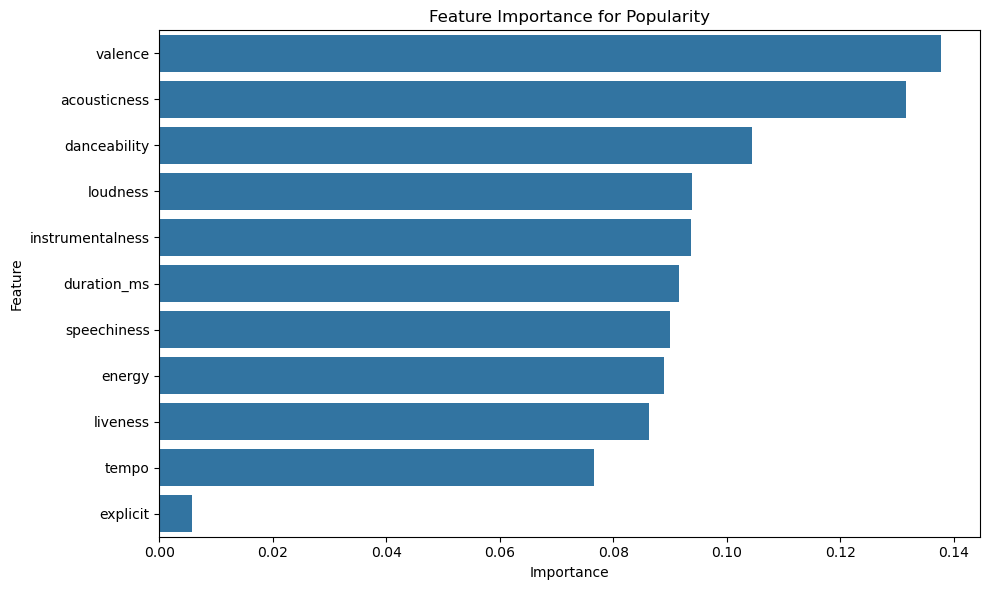

NameError: name 'popular_songs' is not defined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
 
# Load CSV file using pandas
file_path = 'dataset10k.csv'
df = pd.read_csv(file_path)
 
# Reclassify popularity values as 0 and 1
df['popularity'] = df['popularity'].apply(lambda x: 1 if x > 50 else 0)
 
# Define features and target variable
X = df[['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'liveness', 'loudness', 'speechiness', 'instrumentalness', 'duration_ms', 'explicit']]  # Feature columns
y = df['popularity']  # Target variable (popularity score)
 
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Balance the data using SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
 
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Create Random Forest model with expanded hyperparameter range
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=StratifiedKFold(n_splits=5), scoring='f1')
rf_model.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
 
# Evaluate Random Forest results
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))
 
# Create and train Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)
 
# Evaluate Neural Network results
print("Neural Network (MLP) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(f"Precision: {precision_score(y_test, y_pred_mlp)}")
print(f"Recall: {recall_score(y_test, y_pred_mlp)}")
print(f"F1 Score: {f1_score(y_test, y_pred_mlp)}")
print(classification_report(y_test, y_pred_mlp))
 
# Combine different models using VotingClassifier as an ensemble method
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model.best_estimator_),
    ('mlp', mlp_model),
    ('xgb', XGBClassifier(objective='binary:logistic', random_state=42))
], voting='soft')
 
voting_model.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred_voting = voting_model.predict(X_test)
 
# Evaluate VotingClassifier results
print("VotingClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(f"Precision: {precision_score(y_test, y_pred_voting)}")
print(f"Recall: {recall_score(y_test, y_pred_voting)}")
print(f"F1 Score: {f1_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))
 
# Create a plot to visualize feature importances using the Random Forest model
importances = rf_model.best_estimator_.feature_importances_
features = X.columns
 
# Create a DataFrame containing feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
 
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for Popularity')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
 
# Display the number of popular songs
print(f"Total number of popular songs: {len(popular_songs)}")